In [1]:
import pandas as pd
import ollama
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Budgeting_PreTest1_OpenEndedAnswersToCode.xlsx")


## Stopwords

In [3]:
import os

# Define your stopwords path
stopwords_path = "/Users/yaksha/Notes/Research/stopwords/english"

# Read stopwords from the file
with open(stopwords_path, "r") as f:
    stop_words = set(f.read().splitlines())

print("Stopwords loaded successfully:", list(stop_words)[:10])  # Print first 10 stopwords for verification


Stopwords loaded successfully: ['been', 'hers', 't', 'an', "we'd", "she'll", "we'll", 'during', 'it', 'until']


# Currenly keeping Budget

In [4]:
df_curr_budgetCond = df[df["budgetCond"] == "cur"]

### Preprocessing

In [5]:
import re

# Function to clean text
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation & numbers
    words = text.split()  # Tokenize words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply cleaning to the "reasonBudget" column
df_curr_budgetCond["clean_reasonBudget"] = df_curr_budgetCond["reasonBudget"].astype(str).apply(clean_text)

# Show cleaned text
print(df_curr_budgetCond[["reasonBudget", "clean_reasonBudget"]].head())


                                        reasonBudget  \
0  So I don't waste money or lose track of how mu...   
1  I do not earn my own money and keeping a track...   
2  I am an international student and it has been ...   
3                     saving money and keeping track   
4  I like to have large sums of money available f...   

                                  clean_reasonBudget  
0         dont waste money lose track much ive spent  
1  earn money keeping track makes feel like adult...  
2  international student difficult finding paid j...  
3                         saving money keeping track  
4  like large sums money available unknown circum...  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/2161058499.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_budgetCond["clean_reasonBudget"] = df_curr_budgetCond["reasonBudget"].astype(str).apply(clean_text)


### Top Keywords

In [6]:
from collections import Counter

# Combine all cleaned responses into one large text
all_text_budgetCond = " ".join(df_curr_budgetCond["clean_reasonBudget"])

# Count the most common words
word_counts = Counter(all_text_budgetCond.split())

# Display the top 10 keywords
print("Top 10 Keywords:", word_counts.most_common(10))


Top 10 Keywords: [('money', 81), ('save', 31), ('saving', 17), ('spend', 16), ('want', 15), ('much', 14), ('future', 14), ('student', 13), ('make', 12), ('like', 11)]


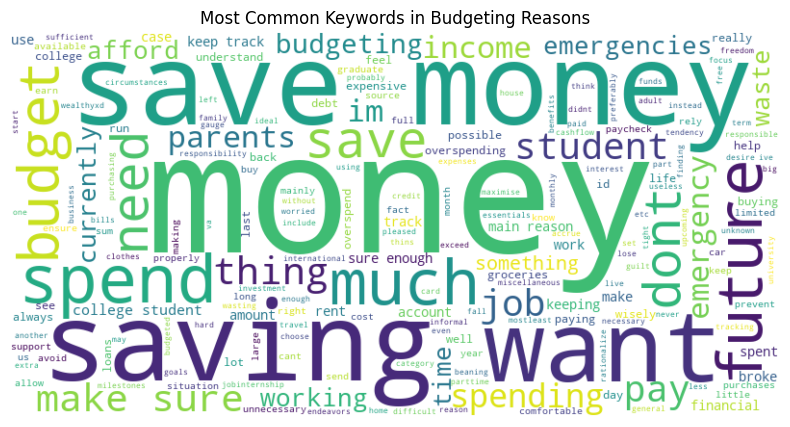

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_budgetCond)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Budgeting Reasons")
plt.show()

In [8]:
all_text_budgetCond = " ".join(df_curr_budgetCond["clean_reasonBudget"])
all_text_budgetCond

'dont waste money lose track much ive spent earn money keeping track makes feel like adult want pay parents back hard work international student difficult finding paid jobinternship us rely money parents feel responsibility properly budget saving money keeping track like large sums money available unknown circumstances save emergencies make sure enough money fall back pay bills save money wasting money dont worried money future make sure enough money times thins need never run need want sufficient amount money savings account investment account case emergency another reason would avoid spending money unnecessary things moneys tight dont like broke want save money future properly save money save much possible save future make sure saving using money wisely saving money future time beaning need save money afford rent groceries well buy things interest keep track money full time student currently working rely va benefits income want ensure enough funds family keeping track expenses see sp

### LLM model

In [95]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_budgetCond}"}])

summary = response['message']['content']
print(summary)



 The text describes a situation where an international student, who relies on their parents' support, is finding it difficult to secure a paid job or internship in the US. They express the desire to earn money and start paying their parents back for all their efforts. They understand that keeping track of expenses helps them feel like adults and avoid wasting money. They want financial freedom and are budgeting to save for future big purchases, such as purchasing a home, paying student loans, travel, or starting a business. The main reasons they budget include factoring in the limited cashflow of being a college student working part-time, avoiding unnecessary spending, and preparing for emergencies. They want to ensure that they have enough money for essentials while also not overspending on things they don't really need. They acknowledge that their budgeting strategy helps them rationalize their purchases and avoid accruing credit card debt. They understand that every little bit saved

### Feel

In [58]:
df_curr_feel = df[df["budgetCond"] == "cur"]

df_curr_feel["clean_feel"] = df_curr_feel["feel"].astype(str).apply(clean_text)

# Show cleaned text
print(df_curr_feel[["feel", "clean_feel"]].head())

                                                feel  \
0  It makes me feel more productive and less scar...   
1  I feel that it makes me feel responsible and h...   
2  Budgeting makes me feel secure and justified i...   
3  Great when i am doing a good job, no great whe...   
4  It makes me feel organized and able to reach m...   

                                          clean_feel  
0   makes feel productive less scared spending money  
1  feel makes feel responsible happy survive tigh...  
2  budgeting makes feel secure justified purchase...  
3           great good job great spending even fault  
4              makes feel organized able reach goals  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/1765075400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_feel["clean_feel"] = df_curr_feel["feel"].astype(str).apply(clean_text)


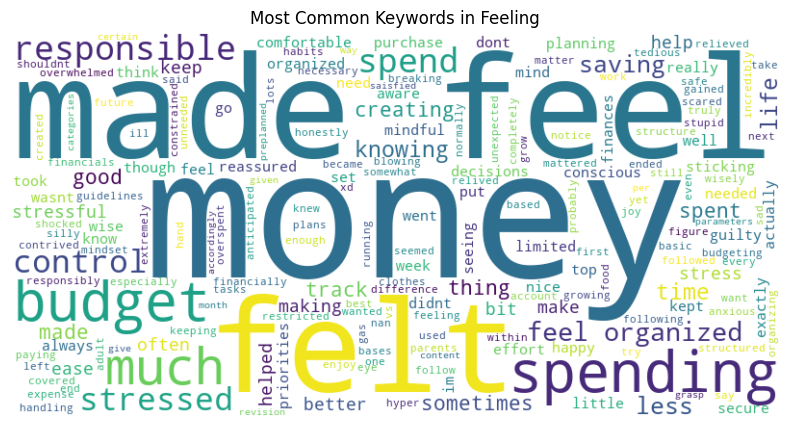

In [59]:
all_text_feel = " ".join(df_curr_feel["clean_feel"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_reasonBudget)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Feeling")
plt.show()

In [61]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_feel}"}])


summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 Budgeting helps you organize your spending, giving a sense of control and security over your finances
It helps you make responsible financial decisions by allowing you to efficiently allocate money, reduce unnecessary costs, and effectively save for long-term goals
Creating a budget also lessens anxiety about wasting money, and provides a guideline for your spending habits
However, it can sometimes feel restrictive or overwhelming, and may cause stress when trying to stick to it
It's important to remember that budgeting is a tool to help manage your finances responsibly and securely, not a restriction.


## howDecide

In [10]:
df_curr_howDecide = df[df["budgetCond"] == "cur"]

In [11]:
df_curr_howDecide["clean_howDecide"] = df_curr_howDecide["howDecide"].astype(str).apply(clean_text)


print(df_curr_howDecide[["howDecide", "clean_howDecide"]].head())

                                           howDecide  \
0  I decided based on the average spending I had ...   
1  I set my first budget when I was 10 and would ...   
2  For me, it came down to how often I needed to ...   
3  I just made the calculations for how much i wo...   
4                                     based on needs   

                                     clean_howDecide  
0                decided based average spending past  
1  set first budget would get pocket money chores...  
2  came often needed request money parents based ...  
3  made calculations much would absolutely need c...  
4                                        based needs  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/3553358802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_howDecide["clean_howDecide"] = df_curr_howDecide["howDecide"].astype(str).apply(clean_text)


In [12]:
all_text_howDecide = " ".join(df_curr_howDecide["clean_howDecide"])
all_text_howDecide

'decided based average spending past set first budget would get pocket money chores would save half budget week snacks rest needed go shopping came often needed request money parents based allowed see much needed allocate foodgroceries bills leisure spending made calculations much would absolutely need category went based needs  calculated much bills tuition would cost subtracted income leaving rest spending money money towards savings  decided depending much items needed ex grocery exercise hobby looked much typically spend see much actually spend vs much would want spend necessity categories like food need often get allotted money take certain percentage paycheck allocate main categories spending paycheck goes fixed expanses like rent gas bills goes savings investment accounts paycheck goes fun things like going friends movies shopping went based money make subtracted fixed expenses proceeded dedicate percentage left money different categories use approach salary goes savings account

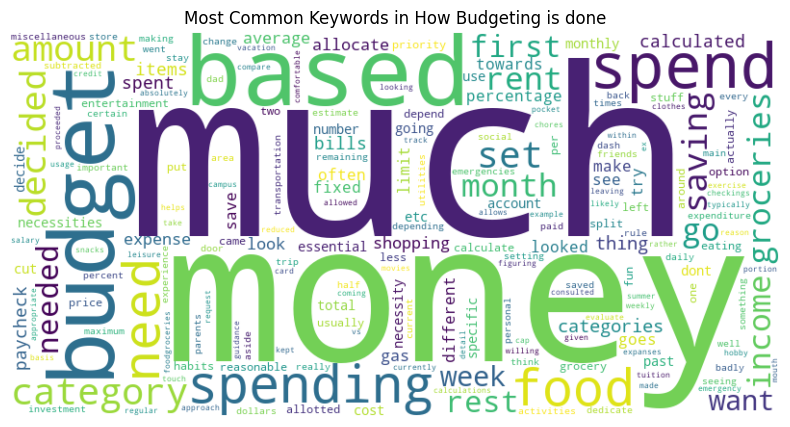

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_howDecide)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in How Budgeting is done")
plt.show()

In [14]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_howDecide}"}])

summary = response['message']['content']
print(summary)

 The individual decided to allocate their pocket money based on their past spending patterns, with a fixed percentage going towards savings and the rest being spent on weekly necessities like groceries and snacks. They regularly go shopping and request money from parents when needed. They made calculations to determine how much they would absolutely need for items such as food, groceries, bills, and leisure spending, taking into account the costs of tuition and their income left after fixed expenses. They found that a significant portion of their income was spent on non-essential items, so they decided to cut back on certain categories like ordering food delivery and going out with friends. They set a budget for each category and kept track of their spending on a weekly basis, making adjustments as needed. They also considered their current income level when determining the amounts for each category, choosing affordable options wherever possible. Overall, they aimed to prioritize essen

In [15]:
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The individual decided to allocate their pocket money based on their past spending patterns, with a fixed percentage going towards savings and the rest being spent on weekly necessities like groceries and snacks
They regularly go shopping and request money from parents when needed
They made calculations to determine how much they would absolutely need for items such as food, groceries, bills, and leisure spending, taking into account the costs of tuition and their income left after fixed expenses
They found that a significant portion of their income was spent on non-essential items, so they decided to cut back on certain categories like ordering food delivery and going out with friends
They set a budget for each category and kept track of their spending on a weekly basis, making adjustments as needed
They also considered their current income level when determining the amounts for each category, choosing affordable options wherever possible
Overall, they aimed to prioritize essential n

## failResponse

In [30]:
df_curr_failResponse = df[df["budgetCond"] == "cur"]


In [17]:
df_curr_failResponse["clean_failResponse"] = df_curr_failResponse["failResponse"].astype(str).apply(clean_text)


print(df_curr_failResponse[["failResponse", "clean_failResponse"]].head())

                                        failResponse  \
0  I try to make up for it by spending less the n...   
1  I usually try my best not to spend any more af...   
2  I try to cut back on my personal spending as m...   
3  I try to cut back on the extras i allow, like ...   
4      Lock in and align myself with budgeting needs   

                                  clean_failResponse  
0                  try make spending less next month  
1            usually try best spend able meet budget  
2  try cut back personal spending much possible s...  
3  try cut back extras allow like wont eat week w...  
4                         lock align budgeting needs  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/274938868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_failResponse["clean_failResponse"] = df_curr_failResponse["failResponse"].astype(str).apply(clean_text)


In [18]:
all_text_failResponse = " ".join(df_curr_failResponse["clean_failResponse"])
all_text_failResponse

'try make spending less next month usually try best spend able meet budget try cut back personal spending much possible solely focus rent bills food try cut back extras allow like wont eat week wont hangout friends money settingxd lock align budgeting needs cut partial spending next month try save following month allow self splurge month treat good month studies job try save later spend money unless absolutely necessary stick budget know come next paycheck affect next budgeting period tend save extra next couple weeks put saving budget back track sometimes things cant account budget things like accidental late fees sometimes ill choose buy something someone care worth dollars budget cut next month make practice selfcontrol hold stronger budget following time period budget save spend less following month spend less next budget cycle dont really anything since still extra money saved restrict spending budget next week consider expenses incurred put tighter budget upcoming month spend lit

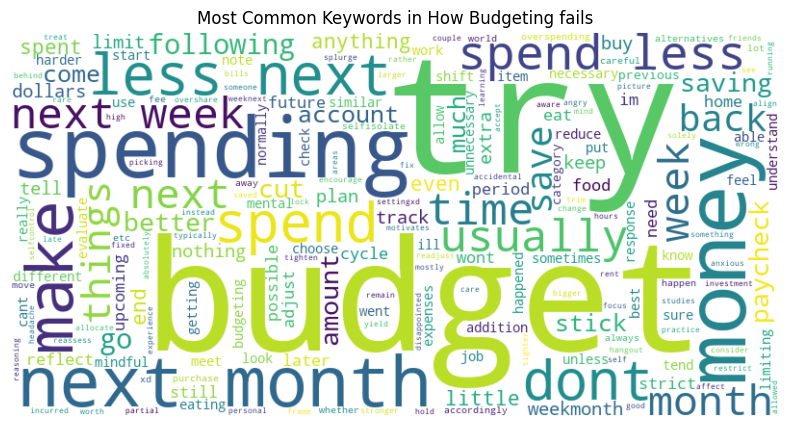

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_failResponse)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in How Budgeting fails")
plt.show()

In [20]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_failResponse}"}])

summary = response['message']['content']
print(summary)

 In the text, the author discusses their plan to reduce personal spending in the upcoming month by focusing on essential expenses such as rent and food, while cutting back on non-essential items like entertainment or dining out with friends. They plan to practice self-control and avoid unnecessary purchases, setting aside extra money for savings or potential future expenses. They also mention being mindful of overspending in certain categories, and making adjustments to their budget accordingly. The author encourages themselves to save as much as possible, while acknowledging that external circumstances may impact their budget uncontrollably. They conclude by stating that they aim to spend less in the next month and reflect on their spending habits to make improvements in the future.


In [21]:
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 In the text, the author discusses their plan to reduce personal spending in the upcoming month by focusing on essential expenses such as rent and food, while cutting back on non-essential items like entertainment or dining out with friends
They plan to practice self-control and avoid unnecessary purchases, setting aside extra money for savings or potential future expenses
They also mention being mindful of overspending in certain categories, and making adjustments to their budget accordingly
The author encourages themselves to save as much as possible, while acknowledging that external circumstances may impact their budget uncontrollably
They conclude by stating that they aim to spend less in the next month and reflect on their spending habits to make improvements in the future.


### reasonUnplea

In [40]:
df_curr_reasonUnplea = df[df["budgetCond"] == "cur"]  # Filter based on budgetCond, not reasonUnplea

df_curr_reasonUnplea["clean_reasonUnplea"] = df_curr_reasonUnplea["reasonUnplea"].astype(str).apply(clean_text)

print(df_curr_reasonUnplea[["reasonUnplea", "clean_reasonUnplea"]].head())  # Verify output


                                        reasonUnplea  \
0                                                NaN   
1  It's unpleasant because keeping a track of mon...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                              clean_reasonUnplea  
0                                            nan  
1  unpleasant keeping track money gets difficult  
2                                            nan  
3                                            nan  
4                                            nan  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/903650161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_reasonUnplea["clean_reasonUnplea"] = df_curr_reasonUnplea["reasonUnplea"].astype(str).apply(clean_text)


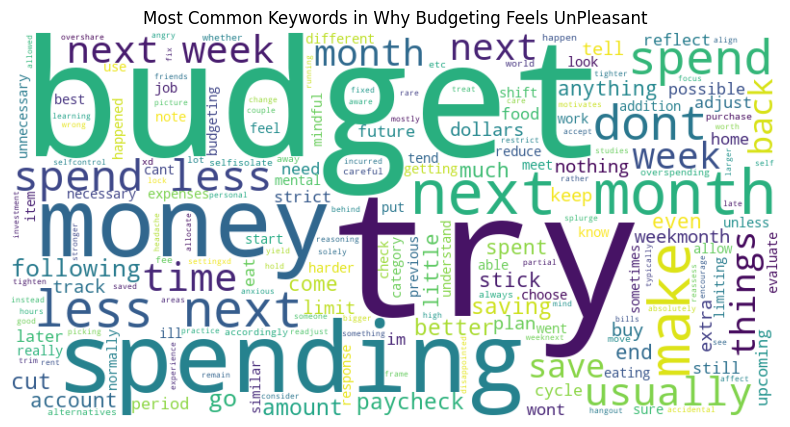

In [41]:
all_text_reasonUnplea = " ".join(df_curr_reasonUnplea["clean_reasonUnplea"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_failResponse)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Why Budgeting Feels UnPleasant")
plt.show()


In [42]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_reasonUnplea}"}])

summary = response['message']['content']
print(summary)

 The article discusses the struggle of managing a tight budget, as it can feel restrictive and frustrating. Despite the concept of budgeting being beneficial in the long run, the constant awareness of spending and trying to stay within budget can be stressful, especially when high prices make it difficult to afford desired items. This constant struggle tests self-control, as people often want to buy more than their budget allows. The respondents also expressed frustration that they cannot buy everything they want without going over their budget, which leads to feelings of limited financial freedom and increased stress. They mentioned skipping class multiple times in a quarter due to financial worries, and the constant fear of not having enough money for necessities like rent and food adds to the stress. Overall, while budgeting is important, it can be an unpleasant experience due to the need for constant self-control and awareness of spending.


In [43]:
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The article discusses the struggle of managing a tight budget, as it can feel restrictive and frustrating
Despite the concept of budgeting being beneficial in the long run, the constant awareness of spending and trying to stay within budget can be stressful, especially when high prices make it difficult to afford desired items
This constant struggle tests self-control, as people often want to buy more than their budget allows
The respondents also expressed frustration that they cannot buy everything they want without going over their budget, which leads to feelings of limited financial freedom and increased stress
They mentioned skipping class multiple times in a quarter due to financial worries, and the constant fear of not having enough money for necessities like rent and food adds to the stress
Overall, while budgeting is important, it can be an unpleasant experience due to the need for constant self-control and awareness of spending.


## Have kept Budget in the Past

### feel

In [49]:
df_past_feel = df[df["budgetCond"] == "past"]

df_past_feel["clean_feel"] = df_past_feel["feel"].astype(str).apply(clean_text)

# Show cleaned text
print(df_past_feel[["feel", "clean_feel"]].head())

                                                  feel  \
165  Having a budget made me feel more at ease with...   
166  I felt secure in my financials and it relieved...   
167  It made me feel comfortable knowing how much I...   
168  It made me feel like I was in control of my mo...   
169  Less stress was put on me by the end of the we...   

                                            clean_feel  
165  budget made feel ease money time felt limited ...  
166             felt secure financials relieved stress  
167        made feel comfortable knowing much spending  
168  made feel like control money felt ease knowing...  
169  less stress put end week knew exactly much mon...  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/3168674928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past_feel["clean_feel"] = df_past_feel["feel"].astype(str).apply(clean_text)


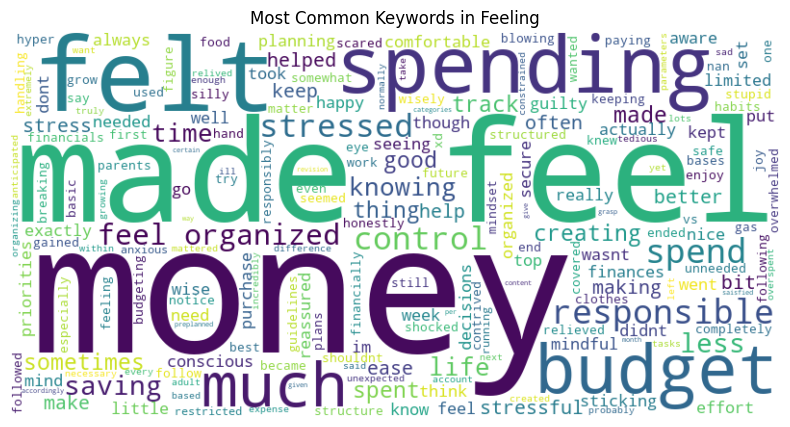

In [51]:
all_text_feel = " ".join(df_past_feel["clean_feel"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_reasonBudget)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Feeling")
plt.show()

In [52]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_feel}"}])


summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The article suggests that making and following a budget can help individuals feel more in control of their finances, reduce stress, and promote mindful spending
It explains how creating a budget can lead to feeling more organized, responsible, and secure, and can help individuals make better financial decisions
However, it also points out that the process of creating and maintaining a budget can be tedious and time-consuming, and may require some adjustments and revisions
Overall, the article suggests that having a budget in place can help individuals feel more organized, responsible, and secure with their finances, while also helping them to save money and make more mindful spending decisions.


### reasonBudget

In [45]:
df_past_reasonBudget = df[df["budgetCond"] == "past"]

df_past_reasonBudget["clean_reasonBudget"] = df_past_reasonBudget["reasonBudget"].astype(str).apply(clean_text)

# Show cleaned text
print(df_past_reasonBudget[["reasonBudget", "clean_reasonBudget"]].head())

                                          reasonBudget  \
165  Because I started living on my own so being ab...   
166                       To save money for the future   
167  I had a stable income, but it wasn't enough to...   
168                                      To save money   
169  To ensure I have enough money for any unplanne...   

                                    clean_reasonBudget  
165  started living able pay rent time became top p...  
166                                  save money future  
167  stable income wasnt enough cover rent pull sav...  
168                                         save money  
169  ensure enough money unplanned circumstances sa...  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/248844636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past_reasonBudget["clean_reasonBudget"] = df_past_reasonBudget["reasonBudget"].astype(str).apply(clean_text)


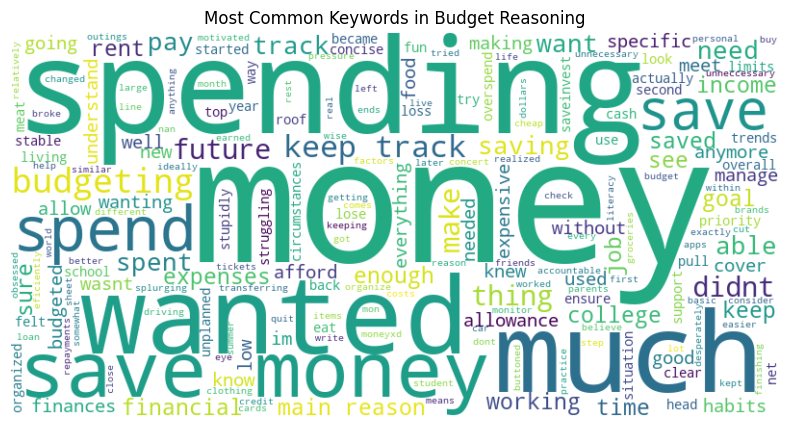

In [47]:
all_text_reasonBudget = " ".join(df_past_reasonBudget["clean_reasonBudget"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_reasonBudget)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Budget Reasoning")
plt.show()

In [48]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_reasonBudget}"}])


summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The text describes an individual's personal journey towards managing their finances effectively, with the primary goal being to cover living expenses and save for future stability
They emphasized the importance of budgeting, tracking spending habits, and setting financial goals to avoid overspending
The person recognized that saving money was crucial for unforeseen circumstances and a secure future
Despite some initial resistance to budgeting, they realized its benefits in understanding their spending patterns, making informed decisions, and avoiding unnecessary expenses
They also mentioned the importance of budgeting for personal growth, accountability, and achieving financial goals
The text suggests that budgeting is the first step towards financial literacy and living within one's means.


### reasonNoBudget

In [63]:
df_past_nobud = df[df["budgetCond"] == "past"]

df_past_nobud["clean_reasonNoBudget"] = df_past_nobud["reasonNoBudget"].astype(str).apply(clean_text)

# Show cleaned text
print(df_past_nobud[["reasonNoBudget", "clean_reasonNoBudget"]].head())

                                        reasonNoBudget  \
165   because i eventually get really lazy and give up   
166                      I fear looking at my finances   
167  I just haven't really thought about one recent...   
168  I am not working a full-time job so I don't ha...   
169  I don't currently make enough money to budget ...   

                                  clean_reasonNoBudget  
165                    eventually get really lazy give  
166                              fear looking finances  
167  havent really thought one recently spend money...  
168        working fulltime job dont consistent income  
169  dont currently make enough money budget variou...  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/58554275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past_nobud["clean_reasonNoBudget"] = df_past_nobud["reasonNoBudget"].astype(str).apply(clean_text)


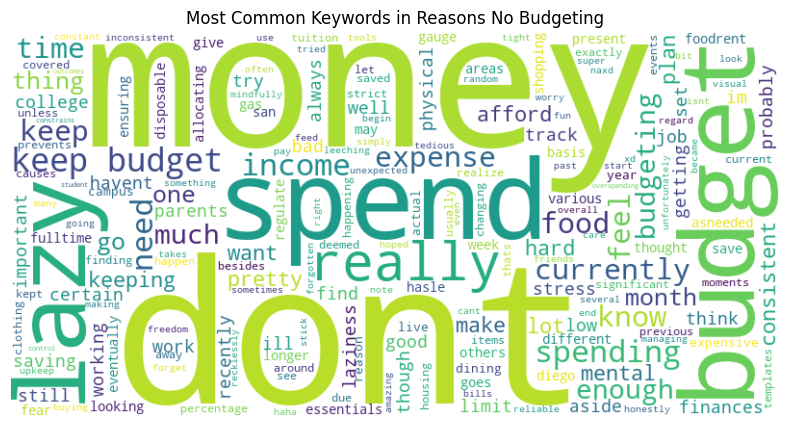

In [65]:
all_text_reasonNobud = " ".join(df_past_nobud["clean_reasonNoBudget"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_reasonNobud)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Reasons No Budgeting")
plt.show()

In [66]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_reasonNobud}"}])


summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The individual, currently residing in San Diego and attending college, acknowledges their lack of budget planning due to inconsistent income, a hectic schedule, and occasional laziness
They admit that they do not track their expenses thoroughly but try to regulate them by setting monthly limits and prioritizing essentials such as food, gas, and rent
Despite knowing the need for saving, they find it stressful and feel pressed for time
Their spending habits are somewhat reckless, with occasional overspending on non-essential items
They express a desire to start budgeting more consistently but struggle due to their irregular income and lack of reliable budgeting tools
They recognize the importance of budgeting, especially when it comes to managing food expenses, but find the process tedious
They hope that in the future, they can find effective tools and approaches to improve their financial situation.


## howDecide

In [67]:
df_past_howDecide = df[df["budgetCond"] == "past"]

df_past_howDecide["clean_howDecide"] = df_past_howDecide["howDecide"].astype(str).apply(clean_text)


print(df_past_howDecide[["howDecide", "clean_howDecide"]].head())

                                             howDecide  \
165  I estimated how much a reasonable amount to sp...   
166         I based it on my income and prioritized it   
167  I was spending $825 a month on rent, and limit...   
168  I split it up by: paying off essentials (bills...   
169  I separated my spending into needs/wants and p...   

                                       clean_howDecide  
165      estimated much reasonable amount spend things  
166                           based income prioritized  
167  spending month rent limited ideally less purch...  
168  split paying essentials bills etc rest would d...  
169  separated spending needswants put percentage m...  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/125133841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past_howDecide["clean_howDecide"] = df_past_howDecide["howDecide"].astype(str).apply(clean_text)


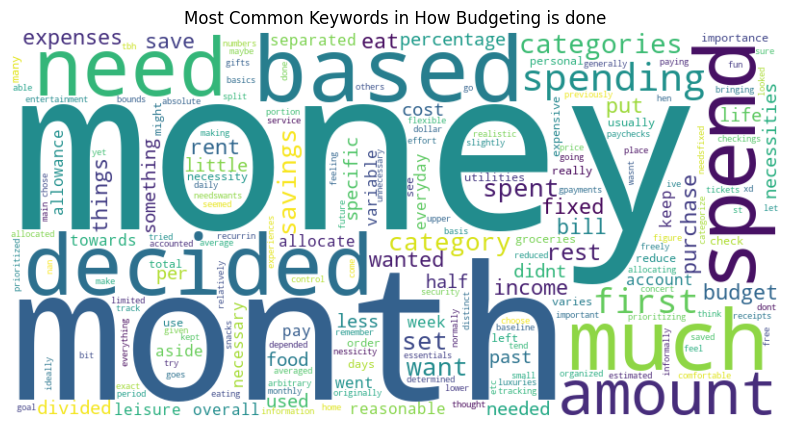

In [68]:
all_text_howDecide = " ".join(df_past_howDecide["clean_howDecide"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_howDecide)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in How Budgeting is done")
plt.show()

In [69]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_howDecide}"}])

summary = response['message']['content']
print(summary)

 The individual aims to create a budget by prioritizing essential spending such as rent, while splitting the remaining funds for daily necessities, savings, and leisure activities. They plan to reduce overall expenses, keep a record of past spending, and adjust their spending based on importance and necessity. Fixed costs like rent and utilities will be paid first, with the rest allocated towards savings. The remainder will be used for groceries and personal spending. They intend to eat at home more often to save money, but will also allow themselves some leisure spending. The budget is flexible, with certain categories like entertainment and groceries having upper and lower bounds. They plan to evaluate their variable expenses monthly and adjust their budget accordingly. They aim to put half of their paychecks into savings, using the remaining funds in their checking account for personal priorities. They've set a realistic spending amount based on past experiences, with the goal of re

In [70]:
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The individual aims to create a budget by prioritizing essential spending such as rent, while splitting the remaining funds for daily necessities, savings, and leisure activities
They plan to reduce overall expenses, keep a record of past spending, and adjust their spending based on importance and necessity
Fixed costs like rent and utilities will be paid first, with the rest allocated towards savings
The remainder will be used for groceries and personal spending
They intend to eat at home more often to save money, but will also allow themselves some leisure spending
The budget is flexible, with certain categories like entertainment and groceries having upper and lower bounds
They plan to evaluate their variable expenses monthly and adjust their budget accordingly
They aim to put half of their paychecks into savings, using the remaining funds in their checking account for personal priorities
They've set a realistic spending amount based on past experiences, with the goal of reducing u

## failResponse

In [71]:
df_past_failResponse = df[df["budgetCond"] == "past"]

df_past_failResponse["clean_failResponse"] = df_past_failResponse["failResponse"].astype(str).apply(clean_text)


print(df_past_failResponse[["failResponse", "clean_failResponse"]].head())

                                          failResponse  \
165  I tried my best to accommodate by making more ...   
166  Food because it varied if I cooked at home or ...   
167  I would try to spend less in the next cycle to...   
168  I didn't do anything, I already spent the mone...   
169        Spent less the following week on my "wants"   

                                    clean_failResponse  
165           tried best accommodate making money work  
166                food varied cooked home bought take  
167               would try spend less next cycle make  
168  didnt anything already spent money thing try s...  
169                    spent less following week wants  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/997924181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past_failResponse["clean_failResponse"] = df_past_failResponse["failResponse"].astype(str).apply(clean_text)


In [72]:
all_text_failResponse = " ".join(df_past_failResponse["clean_failResponse"])
all_text_failResponse

'tried best accommodate making money work food varied cooked home bought take would try spend less next cycle make didnt anything already spent money thing try stay within budget next month spent less following week wants kept livin would try overcompensate reducing purchases another category reducing specific purchase next month making plans save use less future make money tried make spending less next week would make following months spending less wants make losses get back budget nothing really lol limit purchasing something cut little category went budget next set two weeks adjusted either spending habits budget staying true lifestyle continuously pulled money due traveling made realize need save money nothing saved next paycheck nothing reevaluated spending ensure would meet goal following month would cut spending another week spent less month tried adjust budget also cut expenses focus eventually gave save money whenever see possible income try spend lot money thins need nan next

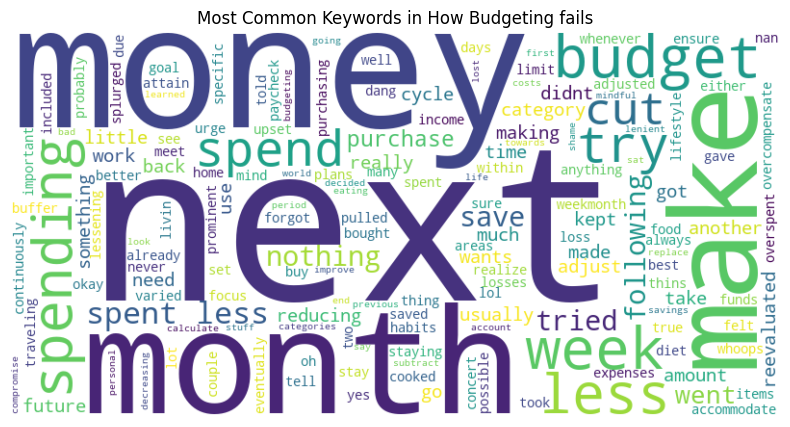

In [73]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_failResponse)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in How Budgeting fails")
plt.show()

In [74]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_failResponse}"}])

summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The individual has been trying to manage their finances by making cuts in various areas, such as food and personal spending, to accommodate unexpected expenses
However, they found themselves overspending in some instances
They have realized the need to save more money for future emergencies and plan to make adjustments in their budget starting from the next month
The goal is to reduce overall spending and focus on necessary purchases only
They will try to be mindful of their purchases and aim to adjust their spending habits while maintaining their lifestyle
They acknowledge that they need to limit purchasing in certain categories, especially when it comes to travel
They plan to calculate their expenses for the next month, subtract what has already been spent, and spend less accordingly
They feel a sense of shame for overspending and have decided to cut something from their budget in the next planning period
They are determined to be more careful with their money going forward.


### reasonUnplea

In [75]:
df_past_reasonUnplea = df[df["budgetCond"] == "past"]  # Filter based on budgetCond, not reasonUnplea

df_past_reasonUnplea["clean_reasonUnplea"] = df_past_reasonUnplea["reasonUnplea"].astype(str).apply(clean_text)

print(df_past_reasonUnplea[["reasonUnplea", "clean_reasonUnplea"]].head())  # Verify output


                                          reasonUnplea  \
165                                                NaN   
166                                                NaN   
167  It's annoying having to keep track of things, ...   
168                                                NaN   
169                                                NaN   

                                    clean_reasonUnplea  
165                                                nan  
166                                                nan  
167  annoying keep track things made feel like limi...  
168                                                nan  
169                                                nan  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/3406659325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past_reasonUnplea["clean_reasonUnplea"] = df_past_reasonUnplea["reasonUnplea"].astype(str).apply(clean_text)


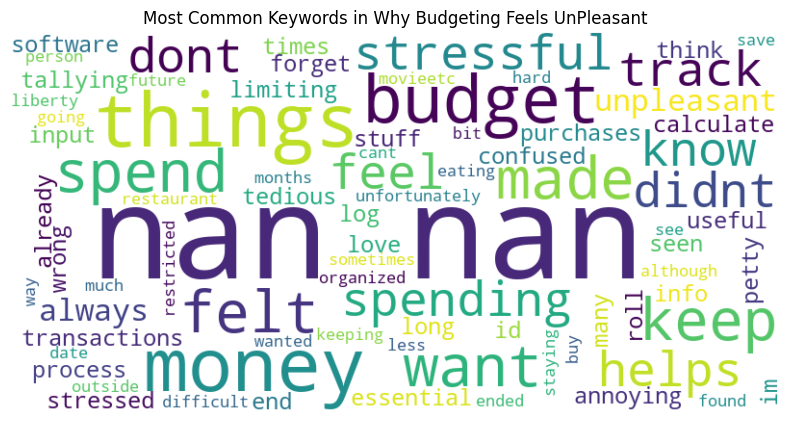

In [88]:
all_text_reasonUnplea = " ".join(df_past_reasonUnplea["clean_reasonUnplea"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_reasonUnplea)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Why Budgeting Feels UnPleasant")
plt.show()


In [77]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_reasonUnplea}"}])

summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The user expresses frustration with keeping a manual budget due to the tedious and stressful process of tracking petty transactions, forgetting budget entries, confusion, and feeling limited in spending
They suggest that a software solution could alleviate these issues by inputting information and automatically calculating expenses, which would help them stay within their budget and keep track of their spending
Despite its utility, the user finds the process of maintaining a budget somewhat unpleasant and restrictive, but acknowledges its importance for saving money in the future
However, they struggle to stick with it because it feels like an unnecessary limitation on their spending freedom, especially when they want to enjoy dining out, going to the movies, etc.


## Never Kept Budget

### Feel

In [78]:
df_never_feel = df[df["budgetCond"] == "never"]

df_never_feel["clean_feel"] = df_never_feel["feel"].astype(str).apply(clean_text)

# Show cleaned text
print(df_never_feel[["feel", "clean_feel"]].head())

                                                  feel  \
107      it feels responsible and more secure and safe   
108  It seems like a smart thing to do and once I h...   
109  A little anxious because I don't know where to...   
110  My main thought is I don't seek to benefit fro...   
111  I think about setting certain percentages of c...   

                                            clean_feel  
107                      feels responsible secure safe  
108  seems like smart thing pay expenses plan using...  
109                     little anxious dont know start  
110  main thought dont seek benefit moment dont thi...  
111  think setting certain percentages certain expe...  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/2078363343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_never_feel["clean_feel"] = df_never_feel["feel"].astype(str).apply(clean_text)


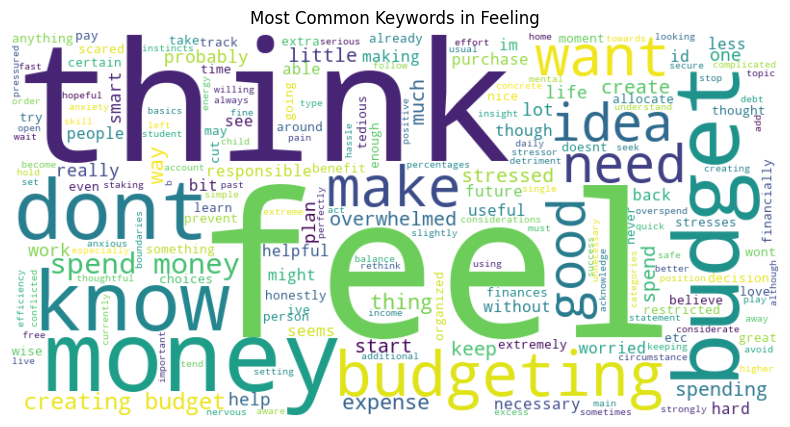

In [92]:
all_text_feel = " ".join(df_never_feel["clean_feel"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_feel)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Feeling")
plt.show()

In [80]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_feel}"}])


summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The individual expresses mixed feelings about creating a budget
They acknowledge the potential benefits, such as managing finances more responsibly and avoiding unnecessary purchases
However, they also mention concerns about the time and effort required to set up a budget, along with feelings of anxiety and stress associated with budgeting
Despite these reservations, the individual recognizes the importance and usefulness of budgeting, particularly for long-term financial planning and responsible spending
They express a desire to start creating a budget soon, but are overwhelmed by the thought of making detailed plans, especially due to uncertainties about unexpected expenses
The individual mentions that they are not currently financially stable and are hesitant about the stress that budgeting might bring
Despite these apprehensions, they acknowledge that budgeting is a smart decision for the future and express a willingness to learn more about it
They mention that they have decided t

### reasonNoBudget

In [83]:
df_never_nobud = df[df["budgetCond"] == "never"]

df_never_nobud["clean_reasonNoBudget"] = df_never_nobud["reasonNoBudget"].astype(str).apply(clean_text)

# Show cleaned text
print(df_never_nobud[["reasonNoBudget", "clean_reasonNoBudget"]].head())

                                        reasonNoBudget  \
107                      i dont spend that much anyway   
108                                I don't need to yet   
109  I feel like I currently don't spend too much m...   
110  I don't have many monthly expenses beyond tran...   
111  I don't keep a budget because I'm a very fruga...   

                                  clean_reasonNoBudget  
107                             dont spend much anyway  
108                                      dont need yet  
109  feel like currently dont spend much money long...  
110  dont many monthly expenses beyond transportati...  
111  dont keep budget im frugal person ever want bu...  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/498704857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_never_nobud["clean_reasonNoBudget"] = df_never_nobud["reasonNoBudget"].astype(str).apply(clean_text)


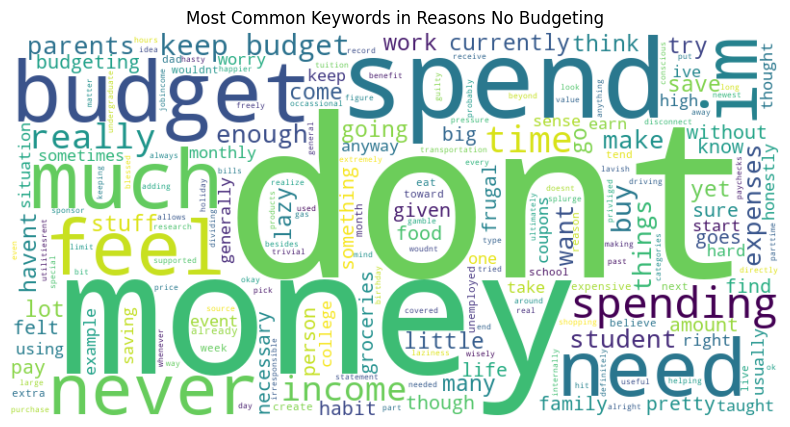

In [84]:
all_text_reasonNobud = " ".join(df_never_nobud["clean_reasonNoBudget"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_reasonNobud)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Reasons No Budgeting")
plt.show()

In [85]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_reasonNobud}"}])


summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The speaker is a student who lives frugally, putting most of their income towards tuition and other necessities like rent, groceries, and utilities
They don't have many monthly expenses beyond these basics
Occasionally, they might splurge on occasional events or items they want, but they try to save money by using coupons for groceries and being mindful of their spending
They don't keep a budget because they feel that they spend their money wisely enough without one, but they acknowledge that budgeting could help them save more money
They are aware that they have the privilege of not needing to budget due to financial support from their parents, and they believe that creating a budget would create extra work for them
They do not have a steady income as they are still a student and living off their parents' support, but they are careful with their spending and try to limit it as much as possible without causing guilt or discomfort
They are unsure about saving money for future months be

### reasonUnplea

In [86]:
df_never_reasonUnplea = df[df["budgetCond"] == "never"]  # Filter based on budgetCond, not reasonUnplea

df_never_reasonUnplea["clean_reasonUnplea"] = df_never_reasonUnplea["reasonUnplea"].astype(str).apply(clean_text)

print(df_never_reasonUnplea[["reasonUnplea", "clean_reasonUnplea"]].head())  # Verify output


                                          reasonUnplea  \
107                                                NaN   
108                                                NaN   
109                                                NaN   
110  I think for a lot of the reasons I mentioned a...   
111                                                NaN   

                                    clean_reasonUnplea  
107                                                nan  
108                                                nan  
109                                                nan  
110  think lot reasons mentioned already adding num...  
111                                                nan  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/473871168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_never_reasonUnplea["clean_reasonUnplea"] = df_never_reasonUnplea["reasonUnplea"].astype(str).apply(clean_text)


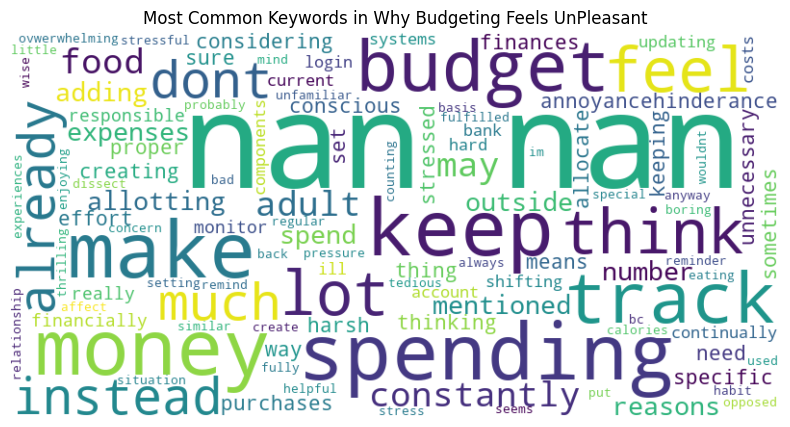

In [89]:
all_text_reasonUnplea = " ".join(df_never_reasonUnplea["clean_reasonUnplea"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_reasonUnplea)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Why Budgeting Feels UnPleasant")
plt.show()


In [90]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_reasonUnplea}"}])

summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 The text suggests that setting a strict budget might be stressful and overwhelming, as it requires constant tracking of expenses, which can feel like unnecessary effort and may lead to stress
The person finds the idea of allocating money to specific categories cumbersome and prefers to keep track of their finances in a less formal way, such as regularly logging into their bank account
However, creating a budget might provide a reminder about responsible spending habits
On the other hand, the text mentions that not setting a budget could lead to unnecessary expenses, annoyance, and hindrance, especially when it comes to making purchases that aren't necessary
The person seems to be concerned that a rigid budget could affect special experiences and potentially create a bad relationship with food
Instead, they suggest enjoying food without constantly monitoring spending or counting calories, as this could make eating feel like a tedious chore rather than a fulfilling experience.


### whatPleasant

In [91]:
df_never_whatPleasant = df[df["budgetCond"] == "never"]

df_never_whatPleasant["clean_whatPleasant"] = df_never_whatPleasant["whatPleasant"].astype(str).apply(clean_text)

# Show cleaned text
print(df_never_whatPleasant[["whatPleasant", "clean_whatPleasant"]].head())

                                          whatPleasant  \
107  it makes you feel more responsible and safe wi...   
108  I think having a budget is a responsible thing...   
109  I find it appealing to know that you are consi...   
110           I think I've already elaborated on this.   
111  What I find appealing about a budget is that i...   

                                    clean_whatPleasant  
107                  makes feel responsible safe money  
108                     think budget responsible thing  
109  find appealing know consistently saving certai...  
110                       think ive already elaborated  
111  find appealing budget allows people spend save...  


/var/folders/hr/spm0t3zn7d5fhtf7b1gg3wdh0000gn/T/ipykernel_35144/3015311001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_never_whatPleasant["clean_whatPleasant"] = df_never_whatPleasant["whatPleasant"].astype(str).apply(clean_text)


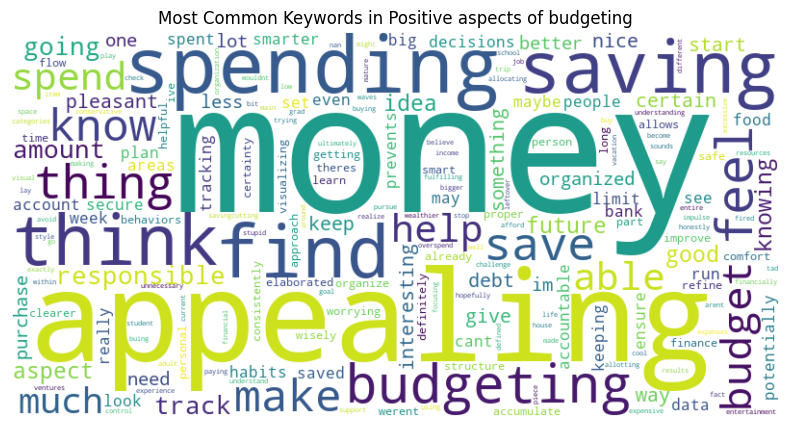

In [93]:
all_text_feel = " ".join(df_never_whatPleasant["clean_whatPleasant"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text_feel)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Keywords in Positive aspects of budgeting")
plt.show()

In [94]:
response = ollama.chat(model="mistral", messages=[{"role": "user", "content": f"Summarize this in a few sentences: {all_text_feel}"}])


summary = response['message']['content']
formatted_summary = "\n".join(summary.split(". ")) 
print(formatted_summary)

 Budgeting is an effective strategy that helps individuals save money wisely, offering a structured approach to personal finance
By consistently setting aside a certain amount of money over time, one can accumulate savings and potentially improve areas like spending habits and behaviors
Visualizing the flow of money provides certainty and comfort, helping avoid unnecessary debt and making future plans more manageable.

A budget allows people to organize their spending, plan for the future, and make smart financial decisions that lead to financial security
By tracking expenses and allocating funds in different categories like food or entertainment, one can stay accountable for their savings efforts
Budgeting data offers valuable insights into spending patterns and provides a clearer idea of where money is going, which can help curb excessive spending and prevent impulse buying.

In the long run, budgeting is appealing because it helps people make responsible financial decisions that lea